In [7]:
#install Shap

!pip install shap


In [8]:
import joblib
final_model = joblib.load("models/final_day5_bestmodel.pkl")


In [9]:
import pandas as pd

X_train = pd.read_csv("data/X_train.csv")
X_val   = pd.read_csv("data/X_val.csv")
X_test  = pd.read_csv("data/X_test.csv")

y_train = pd.read_csv("data/y_train.csv")
y_val   = pd.read_csv("data/y_val.csv")
y_test  = pd.read_csv("data/y_test.csv")


In [10]:
#Prepare Data for SHAP
X_train_transformed = final_model.named_steps['preprocess'].transform(X_train)
model_xgb = final_model.named_steps['model']


In [11]:
# Initialize SHAP Explainer

import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_train_transformed)


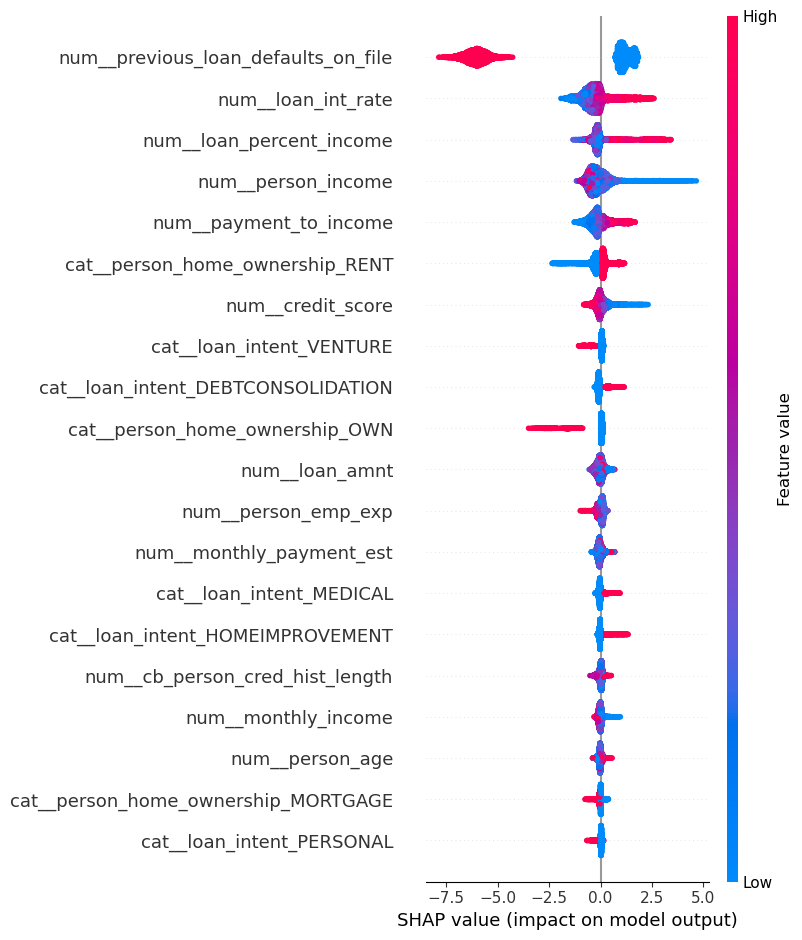

In [12]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=final_model.named_steps['preprocess'].get_feature_names_out())


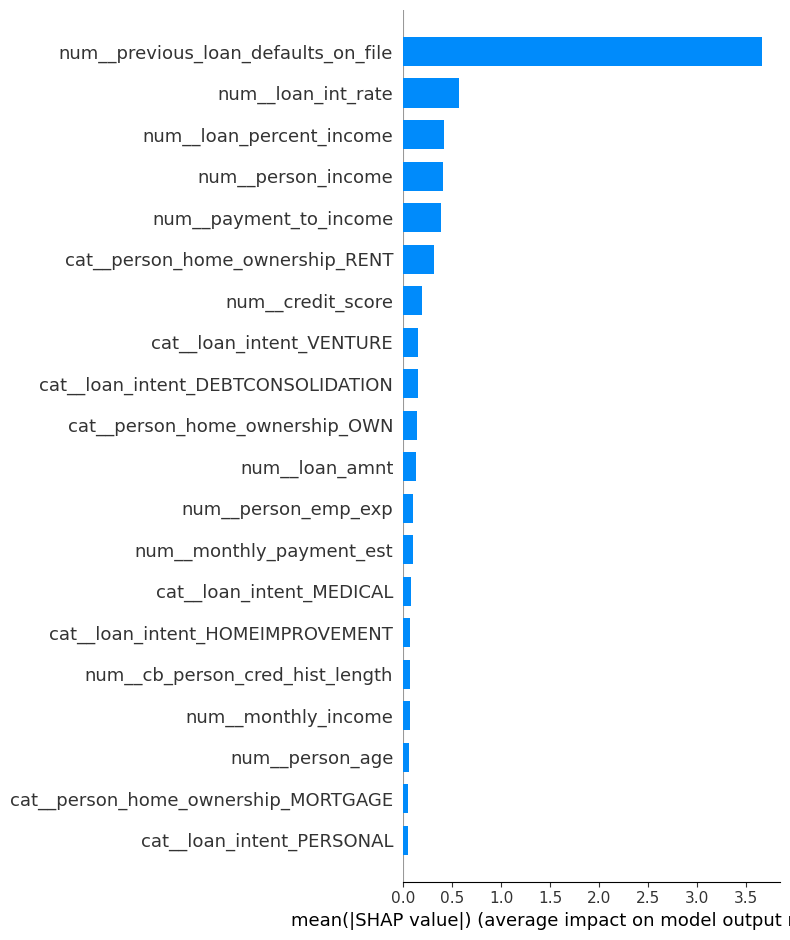

In [14]:
# SHAP Bar Plot (feature ranking)

shap.summary_plot(shap_values, X_train_transformed, feature_names=final_model.named_steps['preprocess'].get_feature_names_out(), plot_type="bar")


In [15]:
# SHAP Dependence Plot

shap.dependence_plot("credit_score", shap_values, X_train_transformed, feature_names=final_model.named_steps['preprocess'].get_feature_names_out())


ValueError: Could not find feature named: credit_score

In [16]:
shap.dependence_plot("payment_to_income", shap_values, X_train_transformed, feature_names=final_model.named_steps['preprocess'].get_feature_names_out())


ValueError: Could not find feature named: payment_to_income

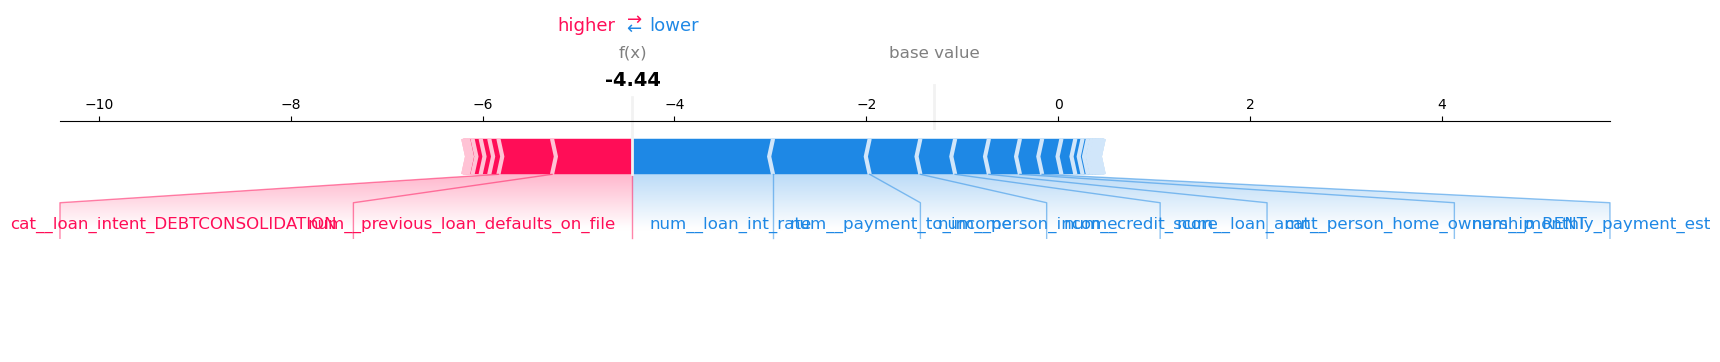

In [19]:
sample = X_val.iloc[[0]]
sample_transformed = final_model.named_steps['preprocess'].transform(sample)

shap.force_plot(
    explainer.expected_value,
    explainer.shap_values(sample_transformed),
    feature_names=final_model.named_steps['preprocess'].get_feature_names_out(),
    matplotlib=True
)

